In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
customer_segmentation = pd.read_csv('E:\KNowledgemetrics\Mall_Customers.csv')

In [4]:
print(customer_segmentation)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [5]:
new_set = customer_segmentation[customer_segmentation.columns[1:5]]

In [6]:
print(new_set)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


In [7]:
new_set['Age_Class'] = pd.cut(x=new_set['Age'], bins=[15,30,45,60,75])

In [8]:
new_set['Annual_Income'] = pd.cut(x=new_set['Annual Income (k$)'], bins=[0,15,30,45,60,75,100,150,200])

In [9]:
new_set['Spending Score'] = pd.cut(x=new_set['Spending Score (1-100)'], bins=[5,20,35,50,65,80,100])

In [10]:
new_set

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Class,Annual_Income,Spending Score
0,Male,19,15,39,"(15, 30]","(0, 15]","(35, 50]"
1,Male,21,15,81,"(15, 30]","(0, 15]","(80, 100]"
2,Female,20,16,6,"(15, 30]","(15, 30]","(5, 20]"
3,Female,23,16,77,"(15, 30]","(15, 30]","(65, 80]"
4,Female,31,17,40,"(30, 45]","(15, 30]","(35, 50]"
...,...,...,...,...,...,...,...
195,Female,35,120,79,"(30, 45]","(100, 150]","(65, 80]"
196,Female,45,126,28,"(30, 45]","(100, 150]","(20, 35]"
197,Male,32,126,74,"(30, 45]","(100, 150]","(65, 80]"
198,Male,32,137,18,"(30, 45]","(100, 150]","(5, 20]"


In [11]:
import matplotlib.pyplot as plt

In [12]:
import numpy as np

In [13]:
new_set_seg =customer_segmentation.iloc[:,3:5].values

In [14]:
new_set_seg

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++')
    kmeans.fit(new_set_seg)
    wcss.append(kmeans.inertia_)

In [16]:
wcss

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30273.394312070028,
 24986.52564064289,
 21900.34135010752,
 19636.75396489815]

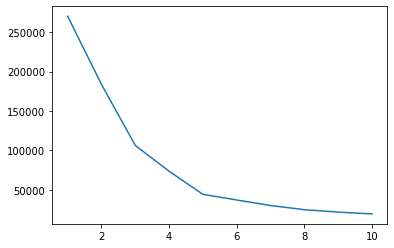

In [17]:
plt.plot(range(1,11),wcss)

In [18]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_kmeans = kmeans.fit_predict(new_set_seg)

In [19]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [20]:
customer_segmentation

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [21]:
pd.concat([customer_segmentation,pd.DataFrame(y_kmeans)], axis = 1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


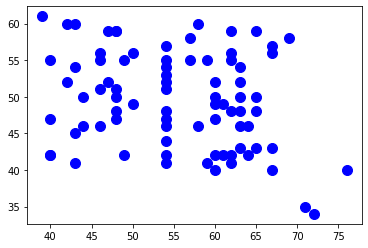

In [22]:
plt.scatter(new_set_seg[y_kmeans ==0,0], new_set_seg[y_kmeans ==0,1], s =100, c = 'blue')

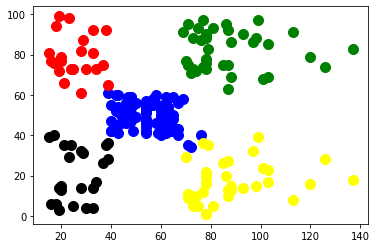

In [23]:
plt.scatter(new_set_seg[y_kmeans ==0,0], new_set_seg[y_kmeans ==0,1], s =100, c = 'blue')
plt.scatter(new_set_seg[y_kmeans ==1,0], new_set_seg[y_kmeans ==1,1], s =100, c = 'green')
plt.scatter(new_set_seg[y_kmeans ==2,0], new_set_seg[y_kmeans ==2,1], s =100, c = 'red')
plt.scatter(new_set_seg[y_kmeans ==3,0], new_set_seg[y_kmeans ==3,1], s =100, c = 'yellow')
plt.scatter(new_set_seg[y_kmeans ==4,0], new_set_seg[y_kmeans ==4,1], s =100, c = 'black')

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
from sklearn import preprocessing

In [26]:
import seaborn as sns

In [27]:
import matplotlib.pyplot as plt

In [28]:
from sklearn.cluster import KMeans

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
kmeans = KMeans(n_clusters=5).fit(new_set_seg)
normalized_vectors = preprocessing.normalize(new_set_seg)
normalized_kmeans = KMeans(n_clusters=5).fit(normalized_vectors)
min_samples = new_set_seg.shape[1]+1 
dbscan = DBSCAN(eps=3.5, min_samples=min_samples).fit(new_set_seg)

In [31]:
print('kmeans: {}'.format(silhouette_score(new_set_seg, kmeans.labels_, 
                                           metric='euclidean')))
print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                          normalized_kmeans.labels_,
                                          metric='cosine')))
print('DBSCAN: {}'.format(silhouette_score(new_set_seg, dbscan.labels_, 
                                           metric='cosine')))

kmeans: 0.553931997444648
Cosine kmeans:0.7619057574880997
DBSCAN: -0.5912383145486537
